In [28]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [29]:
# Definisco sistema di Lorenz
def lorenz (t,x):
  sigma = 10
  rho = 28
  beta = 8/3
  dx = sigma*(x[1]-x[0])
  dy = rho*x[0]-x[1]-x[0]*x[2]
  dz = x[0]*x[1]-beta*x[2]

  return np.array([dx,dy,dz])

In [30]:
# Definisco lo Jacobiano del sistema
def jac_lorenz(t,x):
  sigma =10
  rho = 28
  beta = 8/3
  return np.array([
      [-sigma ,sigma ,0],
      [rho-x[2],-1,-x[0]],
      [x[1],x[0],-beta],
  ])

In [31]:
x0 = np.array([1.0, 1.0, 1.0]) # Condizioni iniziali per x, y, z
T_trans = 10 # Tempo di integrazione del sistema
#Uso Runge-Kutta per risolvere l'ODE del sistema tra 0 e T_trans
sol_trans = solve_ivp(lorenz, [0, T_trans], x0, method='RK45', dense_output=True) 
# Mi restituisce una matrice con righe x,y,z. Come punto di partenza per usare Gram-Schmidt uso l'ultima colonna, i valori x,y,z al tempo T_trans.
x_start = sol_trans.y[:,-1]

In [32]:
#scelta parametri per il calcolo
dt = 0.0005  #Passo di integrazione
T_lyap = 1000  #Tempo totale su cui calcolare gli esponenti di Lyapunov
N = T_lyap/dt

In [33]:
#definisco 3 (dimensione lorentz =3) vettori linearmente indipendenti e 3 accumulatori inizializzati a 0
v1 = np.array([1,0,0])
v2 =np.array([0,1,0])
v3 = np.array([0,0,1])
s1=0.0
s2 =0.0
s3 = 0.0

In [34]:
def gram_schmidt (v1,v2,v3): 
  r1 = np.linalg.norm(v1) #Normalizzo il primo vettore
  v1 = v1/r1

  w2 = v2 -(v2 @ v1)*v1  #Rendo v2 ortogonale a v1 e normalizzo
  r2 = np.linalg.norm(w2)
  v2 = w2/r2


  w3 = v3 - (v3 @ v1)*v1 - (v3 @ v2)*v2 #Rendo V3 ortogonale a v1 e v2 e normalizzo
  r3 = np.linalg.norm(w3)
  v3 = w3/r3
  return v1,v2,v3,r1,r2,r3


In [35]:
def rk4 (f,x,dt): #Definisco funzione che usa Runge-kutta del 4 ordine che userò sulla funzione di Lorenz
  k1 = f(0,x)
  k2 =f(0,x+0.5*dt*k1)
  k3 =f(0,x+0.5*dt*k2)
  k4 =f(0,x+dt*k3)
  return x + (dt/6)*(k1+2*k2+2*k3+k4)

In [36]:
def rk4_tan(J,v,dt): #Definisco funzione che usa Runge-Kutta del 4 ordine che userò sui vettori tangenti
  k1 =J @ v
  k2 =J @ (v+0.5*dt*k1)
  k3 =J @ (v+0.5*dt*k2)
  k4 =J @ (v+dt*k3)
  return v + (dt/6)*(k1+2*k2+2*k3+k4)

In [37]:
x = x_start.copy()
l_list1 =[]
l_list2 =[]
l_list3 =[]
time_list =[]
for i in range(int(N)):  #Itero su N e applico Gram-Schmidt a ogni passaggio
  x = rk4(lorenz,x,dt)
  J = jac_lorenz(0,x)
  v1 = rk4_tan(J,v1,dt)

  v2 = rk4_tan(J,v2,dt)

  v3 = rk4_tan(J,v3,dt)
  v1,v2,v3,r1,r2,r3 = gram_schmidt(v1,v2,v3)


  s1 +=np.log(r1)   #aggiorno i contatori s
  s2 +=np.log(r2)
  s3 +=np.log(r3)
  if i%1000==0:
    print(i*dt, s1/T_lyap, s2 /T_lyap, s3/T_lyap)
    t = i*dt
    l_list1.append(s1/T_lyap)
    l_list2.append(s2/T_lyap)
    l_list3.append(s3/T_lyap)
    time_list.append(t)

0.0 -4.992716218682792e-06 -5.052328063216609e-07 -1.3353843082142326e-06
0.5 -0.0004698329768297807 -0.0006948422445800052 -0.005675491445054
1.0 0.0003371289599189977 -0.0010276651642587144 -0.012982963795258227
1.5 0.0005949744292998777 -0.0014214442697615568 -0.019680363492306514
2.0 0.0003471765020168826 -0.0012532540538386222 -0.026434089114109948
2.5 0.001438731781365731 -0.00156183640182048 -0.03405039537854337
3.0 0.0023702662993250116 -0.0018297316462902746 -0.041547367985089095
3.5 0.001582103358455782 -0.001433403080122662 -0.04798886694355754
4.0 0.00320243832185779 -0.0018987635180033869 -0.055977174801996994
4.5 0.002931062789799581 -0.000886839674094738 -0.06355105644682756
5.0 0.002487472622995632 -0.0008939682198226254 -0.06993367106739254
5.5 0.0038544404023500927 -0.0009054337805689434 -0.07812250661894765
6.0 0.004725149764927166 -0.0014259945768589134 -0.08530598851825719
6.5 0.006858858177924303 -0.0020193508379872395 -0.09367967400283632
7.0 0.006064497626837682

In [38]:
print(f"Gli esponenti di Lyapunov sono {s1/T_lyap},{s2/T_lyap},{s3/T_lyap}")


Gli esponenti di Lyapunov sono 0.9033878103355601,-0.0011645766095254222,-14.568889899786637


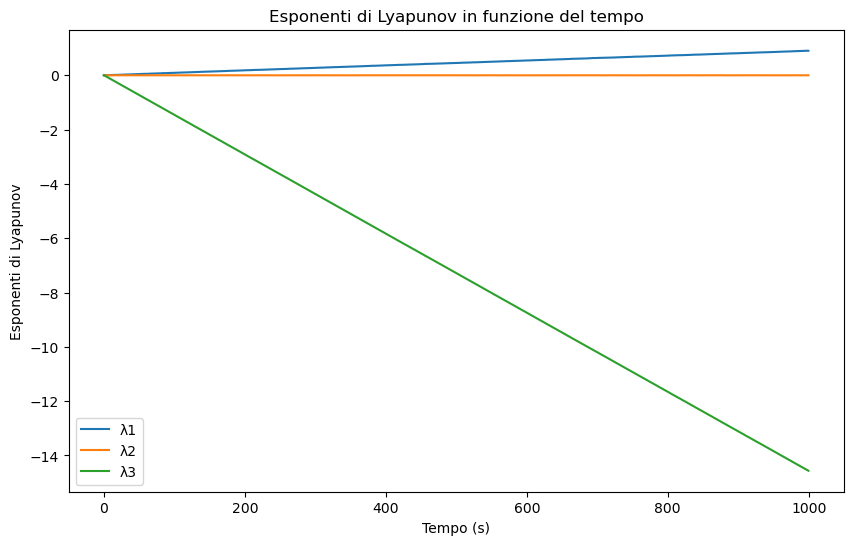

In [39]:
plt.figure(figsize=(10,6))
plt.plot(time_list,l_list1, label ="λ1")
plt.plot(time_list,l_list2, label="λ2")
plt.plot(time_list,l_list3, label = "λ3")
plt.xlabel("Tempo (s)")
plt.ylabel("Esponenti di Lyapunov")
plt.title("Esponenti di Lyapunov in funzione del tempo")
plt.legend()
plt.show()

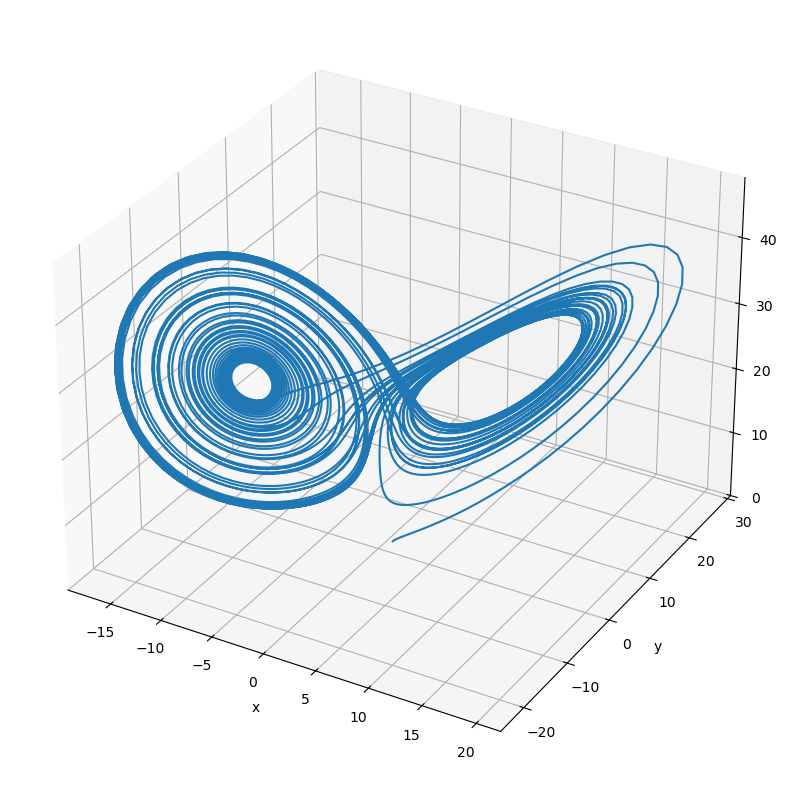

In [44]:
#Evolvo il sistema per un tempo 100s 
sol_lorenz = solve_ivp( lorenz, [0,50], x0, method = 'RK45', dense_output = True)
t_values = np.linspace(0, 50, 5000)
x_values = sol_lorenz.sol(t_values)
#Stampo un grafico 3D di come evolve il sistema. Si nota la caoticità delle traiettorie e comparsa dell' attrattore strano.
#Possiamo variare i parametri e vedere come  il sistema cambia 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.plot(x_values[0], x_values[1], x_values[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()